<a href="https://colab.research.google.com/github/gugainfo/Machine-Learning-Pos-CyberSecurity-Unipe/blob/main/01_Crioterapia_Implementa%C3%A7%C3%A3o_Modelo_de_Machine_Learning_com_Nayve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerando modelo de Machine Learning (classificação)
# Domínio: Pessoas com doença de Verrugas e tratamento com Crioterapia.
# Gustavo Aragão
# Modelo Supervisionado de Apredizado de Máquina

In [2]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
# Estrutura Inicial para um Projeto de Machine Learning.
from IPython.display import Image
Image('Workflow.png')

In [4]:
#Carrega o dataset com os dados para o treinamento e validacao
df_crioterapia_treino = pd.read_csv("dados_cryotherapy.csv", encoding="utf-8")

In [14]:
df_crioterapia_treino.head()

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0


In [15]:
df_crioterapia_treino.tail()


,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
85,2,34,12,3,3,95,0
86,2,20,3,6,1,75,1
87,2,35,8,8,3,100,0
88,1,24,10,10,1,20,1
89,1,19,8,8,1,160,1


In [5]:
df_crioterapia_treino.describe()

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.344444,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.379253,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,1.000000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.000000,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.000000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.000000,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [6]:
# Verificando o formato dos dados
df_crioterapia_treino.shape

(90, 7)

In [7]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_crioterapia_treino[['Sexo', 'Idade', 'Numero_Verrugas', 'Tipo', 'Area']])
#Definição do atributo de classificacao
data_classif = np.array(df_crioterapia_treino['Resultado_Tratamento'])

In [8]:
# Verificando as primeiras linhas do dataset
df_crioterapia_treino.head(5)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0


In [9]:
# Verificando as ultimas linhas do dataset
df_crioterapia_treino.tail(5)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
85,2,34,12,3,3,95,0
86,2,20,3,6,1,75,1
87,2,35,8,8,3,100,0
88,1,24,10,10,1,20,1
89,1,19,8,8,1,160,1


In [18]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_crioterapia_treino, size=35):
    corr = df_crioterapia_treino.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

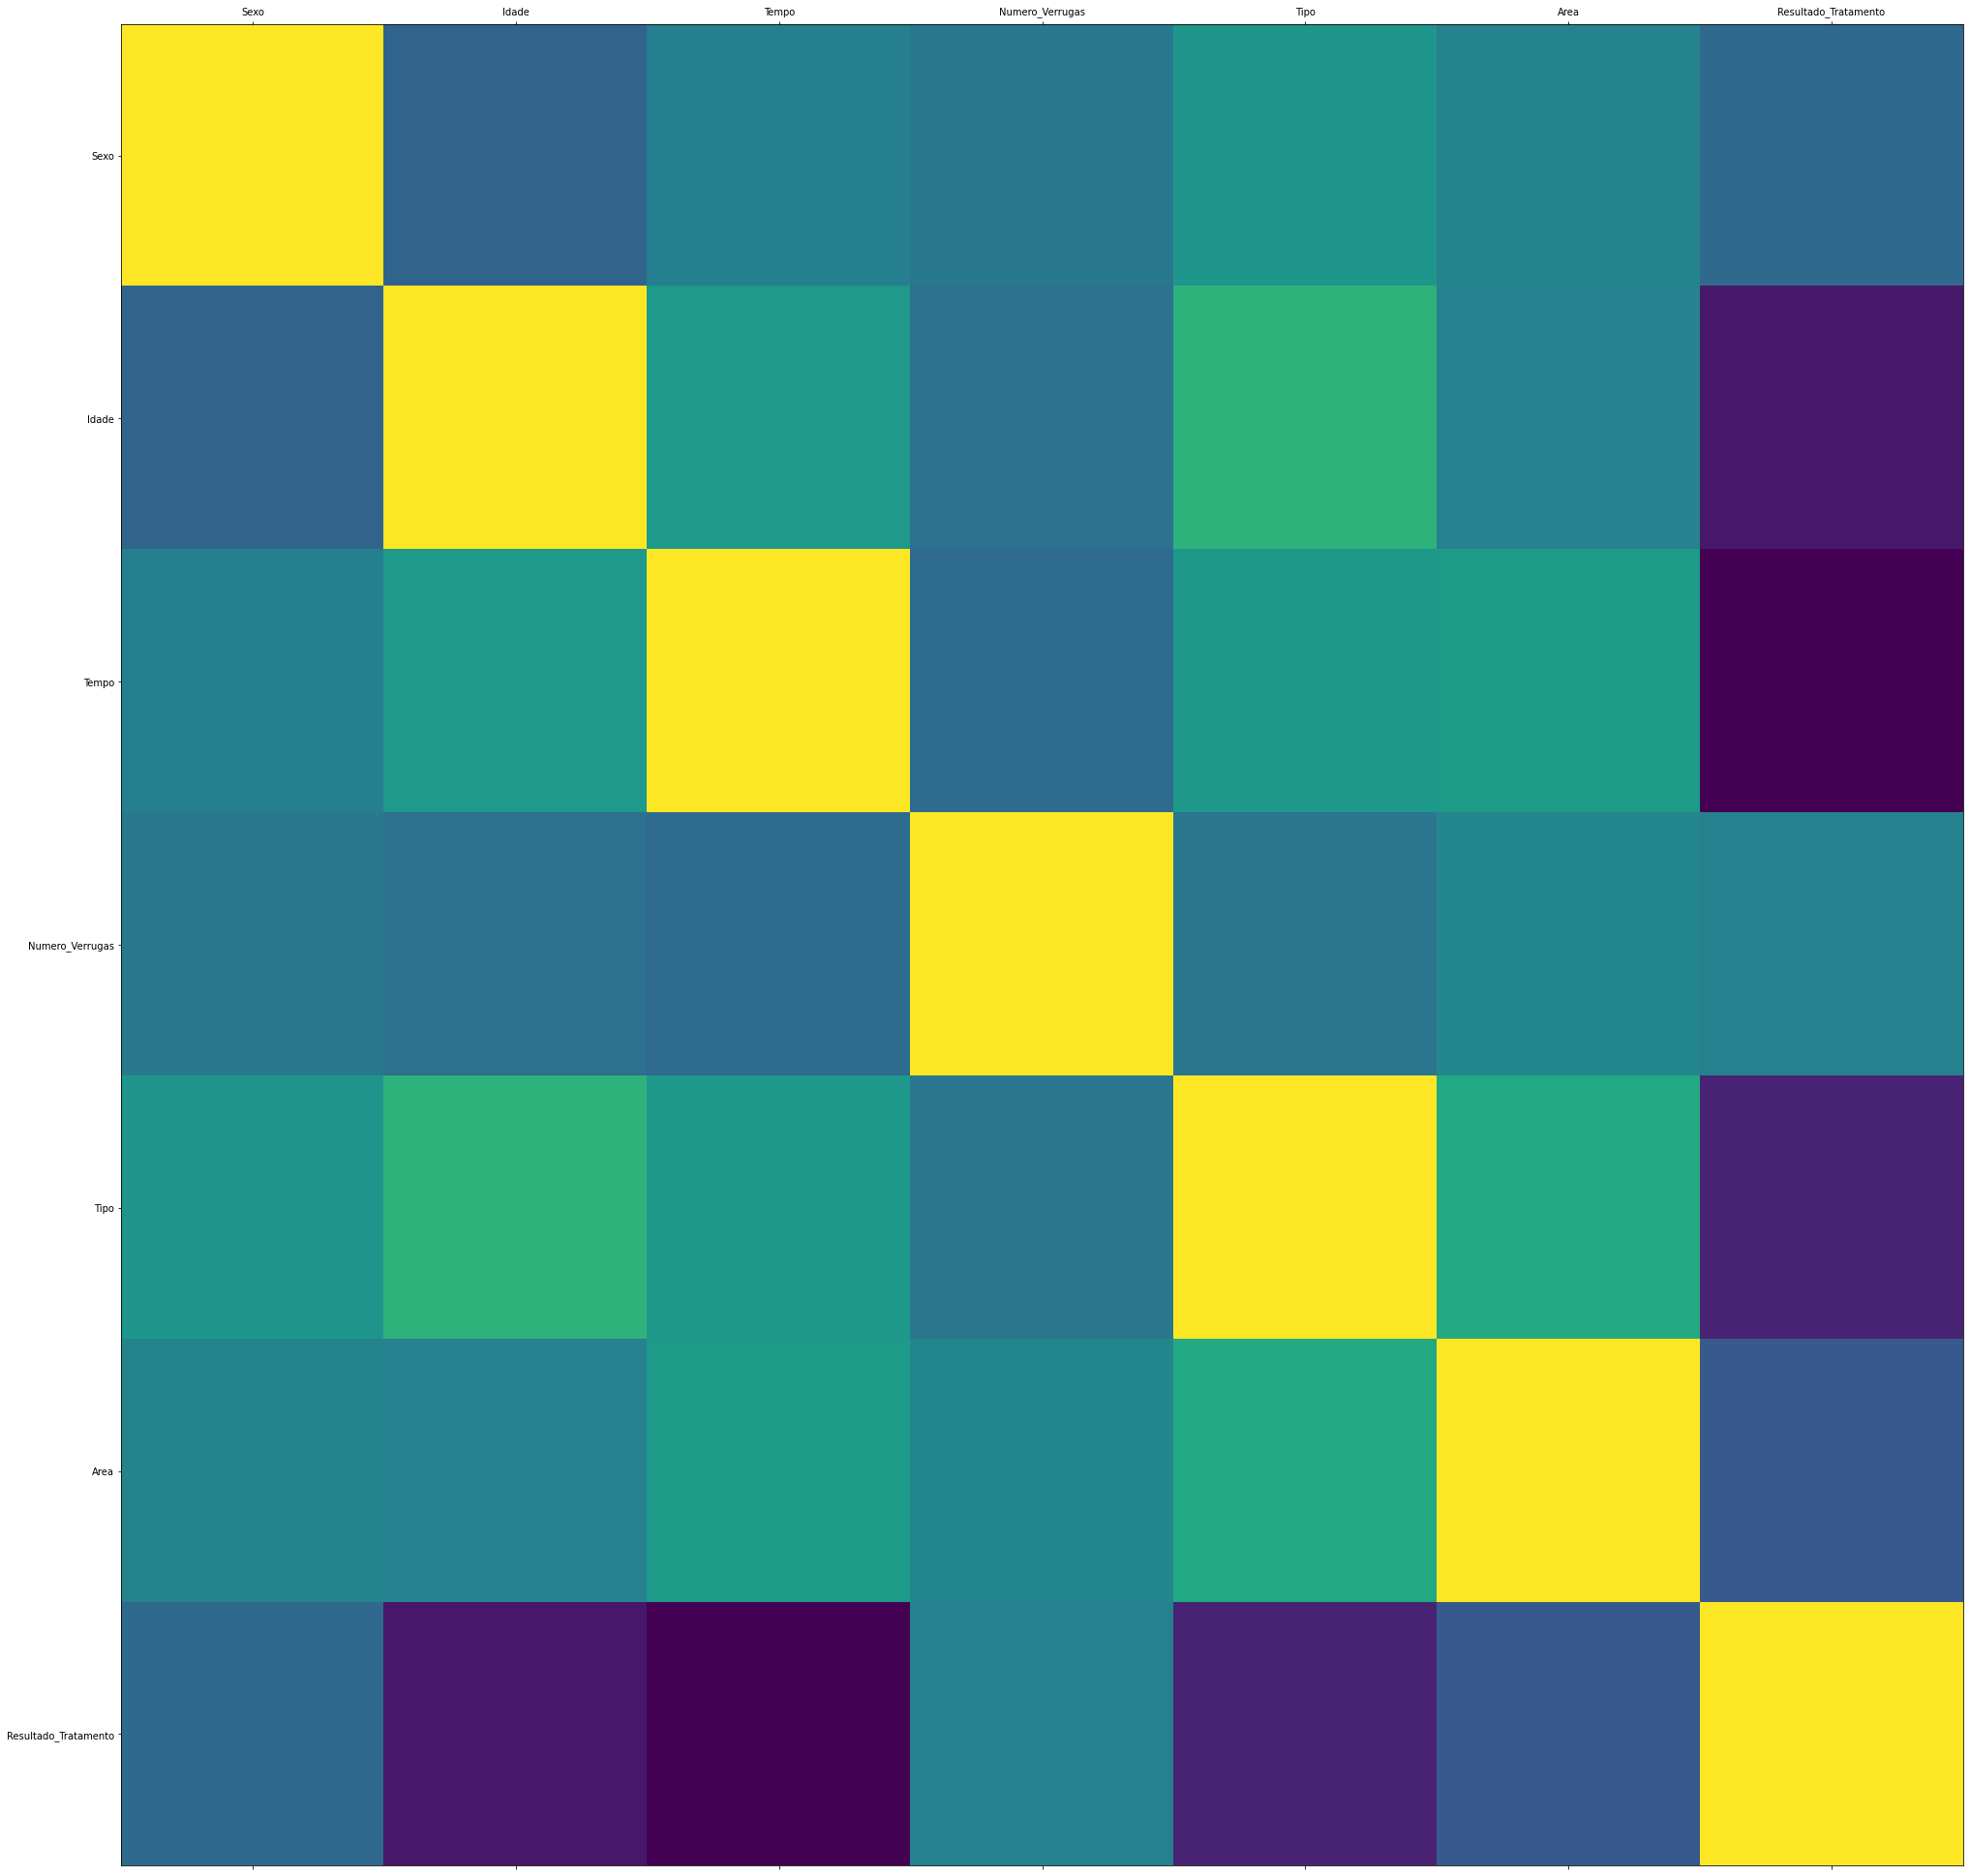

In [19]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df_crioterapia_treino)

In [22]:
# Spliting = 70% para dados de treino e 30% para dados de teste

In [23]:
from IPython.display import Image
Image('Treinamento.png')

In [24]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [25]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  1  59   3   3  20]
 [  2  20   6   1  75]
 [  1  27   5   1   6]
 [  1  35   5   1 100]
 [  2  34   3   3  95]
 [  2  35   5   3 100]
 [  2  18   8   1  80]
 [  2  19   6   1 160]
 [  1  35   9   1 100]
 [  1  16   3   2  60]
 [  1  17   4   1  63]
 [  2  15   3   1   4]
 [  1  15   7   1   6]
 [  1  34   1   3  95]
 [  2  32  12   3 750]
 [  1  36   2   1   8]
 [  1  67   7   1  42]
 [  2  18   1   1  80]
 [  1  67   1   1  42]
 [  1  50  11   3 132]
 [  1  29   5   1  96]
 [  1  15   2   1   4]
 [  1  34   1   3 150]
 [  1  20   3   1   6]
 [  2  21   5   1  35]
 [  2  50   4   3 132]
 [  1  16   3   2  60]
 [  1  30   2   1 115]
 [  2  41   5   2  20]
 [  2  22   2   1  70]
 [  2  15  12   1  30]
 [  1  22   2   1  70]
 [  2  36   6   1   8]
 [  1  28   3   1 100]
 [  1  15   5   1   6]
 [  2  35   8   3 100]
 [  2  40   1   2  80]
 [  2  30   8   3 115]
 [  1  24  10   1  20]
 [  2  15   1   1   6]
 [  1  24   8   1  20]
 [  2  32

In [26]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_crioterapia_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_crioterapia_treino.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [32]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [33]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [36]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8253968253968254
Na Base de Treinamento


In [37]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.6296296296296297
na Base de Teste


In [34]:
from sklearn import metrics

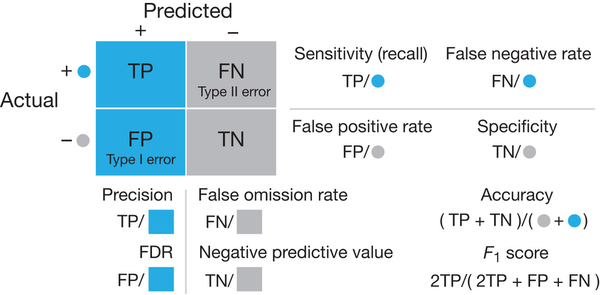

In [ ]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [38]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[ 7  4]
 [ 6 10]]

Classification Report
              precision    recall  f1-score   support

           1       0.54      0.64      0.58        11
           0       0.71      0.62      0.67        16

    accuracy                           0.63        27
   macro avg       0.63      0.63      0.62        27
weighted avg       0.64      0.63      0.63        27



In [39]:
import joblib


In [40]:
# Persistência do modelo no arquivo modelo_criioterapia_MNB.pkl
joblib.dump(modelo_NB, 'modelo_crioterapia_MNB.pkl')


['modelo_crioterapia_MNB.pkl']